## MobileUp - Price Suggestion tool to optimize your sales

### Business Understanding

Sales not only depends on promotion but also how you present your product to customers. While doing online shopping , we tend to click products that have relevant titles or title that has all details that you need. Based on this nature of customers, we are trying to study relation between good title and price, and build price suggestion tool for used iPhone. Seller can use this application to get estimate price and understanding of important keywords to include.  


### Why it matters 

This problem is relevant, because:
* Internet is filled with so many things and your product might not be different. But you can distinguish your product using right title. 
* Not all sellers know latest market trends. This tools helps them to understand important features and how they can improve.

### Our Dataset: Listing title from eBay
* Since focus of project is to find relation between listing title and price of used products, we decided to get data from biggest ecommerce site eBay. eBay developer API is great tool for creating your ecommerce dataset.  
* We scraped over 1000+ listings titles and their corresponding Price from eBay API for iPhone 11, iPhone 12 and iPhone XR. You can check code for webscraping here. 

## Feature Engineering

Since data we collected from eBay was raw dataset, we did feature engineering to get relevant features.

### Data overview

In [1]:
import numpy as np
import pandas as pd

columns = ['Listing', 'Price']
df_iphone11 = pd.read_csv('Iphone11_listing.csv', names = columns, header = None)
df_iphone12 = pd.read_csv('Iphone12_listing.csv', names = columns, header = None)
df_iphoneXR = pd.read_csv('IphoneXR_listing.csv', names = columns, header = None)

In [2]:
df = pd.concat([df_iphone11, df_iphone12, df_iphoneXR], sort=False)

In [3]:
df.head()

,Listing,Price
0,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00
1,"Apple iPhone 11 Pro Max - 64GB 256GB 512GB, Al...",769.99
2,Unlocked Apple iPhone 11 🍎 64GB 128GB 256GB Ve...,499.99
3,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00
4,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00


In [4]:
df.shape

(1013, 2)

### Getting features

We used different pandas series and string operations to get relevant features. We created dummy variables for model type, whether title has memory size, network, color and locked/unlocked mentioned.

In [5]:
import re
df['model_iPhone11'] = df['Listing'].str.contains('iPhone 11|iPhone11' , flags=re.IGNORECASE) & (~df['Listing'].str.contains('Pro' , flags=re.IGNORECASE)) & (~df['Listing'].str.contains('Max' , flags=re.IGNORECASE))

df['model_iPhone11_pro'] = df['Listing'].str.contains('iPhone 11|iPhone11' , flags=re.IGNORECASE) & df['Listing'].str.contains('Pro' , flags=re.IGNORECASE) & (~df['Listing'].str.contains('Max' , flags=re.IGNORECASE))
    
df['model_iPhone11_pro_max'] = df['Listing'].str.contains('iPhone 11|iPhone 11' , flags=re.IGNORECASE) & df['Listing'].str.contains('Pro' , flags=re.IGNORECASE) & df['Listing'].str.contains('Max' , flags=re.IGNORECASE) 

In [6]:
df['model_iPhone12'] = df['Listing'].str.contains('iPhone 12|iPhone12' , flags=re.IGNORECASE) & ~df['Listing'].str.contains('Pro' , flags=re.IGNORECASE)  & ~df['Listing'].str.contains('Max' , flags=re.IGNORECASE) 

df['model_iPhone12_pro'] = df['Listing'].str.contains('iPhone 12|iPhone12' , flags=re.IGNORECASE) & df['Listing'].str.contains('Pro' , flags=re.IGNORECASE) & ~df['Listing'].str.contains('Max' , flags=re.IGNORECASE)

df['model_iPhone12_pro_max'] = df['Listing'].str.contains('iPhone 12|iPhone 12' , flags=re.IGNORECASE) & df['Listing'].str.contains('Pro' , flags=re.IGNORECASE) & df['Listing'].str.contains('Max' , flags=re.IGNORECASE) 

In [7]:
df['model_iPhoneXR'] = df['Listing'].str.contains('iPhone XR|iPhoneXR' , flags=re.IGNORECASE).astype('int')

In [8]:
import re

def correct_name(row):
    if row["model_iPhone11"] == True:
        return "iPhone11"
    elif row["model_iPhone11_pro"] == True:
        return "iPhone11 Pro"
    elif row["model_iPhone11_pro_max"] == True:
        return "iPhone11 Pro Max"
    elif row["model_iPhone12"] == True:
        return "iPhone12"  
    elif row["model_iPhone12_pro"] == True:
        return "iPhone12 Pro" 
    elif row["model_iPhone12_pro_max"] == True:
        return "iPhone12 Pro Max" 
    elif row["model_iPhoneXR"] == 1:
        return "iPhoneXR" 
    else:
        return 'NaN'
    
df["model_category"] = df.apply(correct_name, axis=1)

In [9]:
df['memory_64GB'] = df['Listing'].str.contains('64GB|64 GB|128GB|128 GB|256GB|256 GB|512GB|512 GB', flags = re.IGNORECASE).astype('int')

In [10]:
df['unlocked'] = df['Listing'].str.contains('Unlocked|Network Locked', flags = re.IGNORECASE).astype('int')

In [11]:
network_list = ['AT&T' , 'Verizon',  'Sprint' , 'T-Mobile' , 'ATT' , 'Mint', 'GSM+CDMA','CDMA+GSM','4G','5G','Cricket']
df['network'] = df['Listing'].str.contains('|'.join(network_list), flags = re.IGNORECASE).astype('int')

In [12]:
df['network'].value_counts()

1    900
0    113
Name: network, dtype: int64

In [13]:
network_list = ['All Colors', 'Various Colors','All Color' , 'White' , 'Green' , 'Blue' , 'Pacific', 'Red',
                'Black','White','Purple','Silver','Gold','Graphite','Coral']
df['color'] = df['Listing'].str.contains('|'.join(network_list), flags = re.IGNORECASE).astype('int')

In [14]:
df['color'].value_counts()

0    609
1    404
Name: color, dtype: int64

In [15]:
# Overview of data
df.head()

,Listing,Price,model_iPhone11,model_iPhone11_pro,model_iPhone11_pro_max,model_iPhone12,model_iPhone12_pro,model_iPhone12_pro_max,model_iPhoneXR,model_category,memory_64GB,unlocked,network,color
0,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,True,False,False,False,False,False,0,iPhone11,1,1,1,0
1,"Apple iPhone 11 Pro Max - 64GB 256GB 512GB, Al...",769.99,False,False,True,False,False,False,0,iPhone11 Pro Max,1,1,1,1
2,Unlocked Apple iPhone 11 🍎 64GB 128GB 256GB Ve...,499.99,True,False,False,False,False,False,0,iPhone11,1,1,1,0
3,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,True,False,False,False,False,False,0,iPhone11,1,1,1,0
4,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,True,False,False,False,False,False,0,iPhone11,1,1,1,0


In [16]:
df.isnull().sum()

Listing                   0
Price                     0
model_iPhone11            0
model_iPhone11_pro        0
model_iPhone11_pro_max    0
model_iPhone12            0
model_iPhone12_pro        0
model_iPhone12_pro_max    0
model_iPhoneXR            0
model_category            0
memory_64GB               0
unlocked                  0
network                   0
color                     0
dtype: int64

### Visualization: Model Category vs. Price

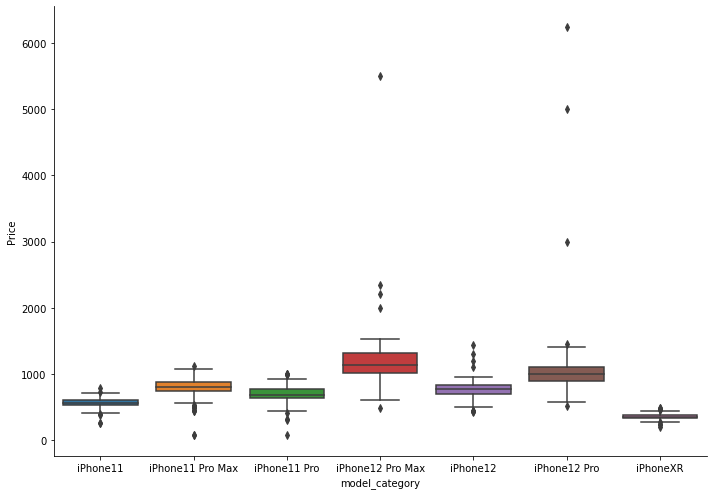

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = 'model_category', y = 'Price', data = df, ax = ax)
sns.despine()
fig.savefig('modelVsprice.png')

In [18]:
#convert boolean type to int
df['model_iPhone11'] = df['model_iPhone11'].astype('int')
df['model_iPhone11_pro'] = df['model_iPhone11_pro'].astype('int')
df['model_iPhone11_pro_max'] = df['model_iPhone11_pro_max'].astype('int')
df['model_iPhone12'] = df['model_iPhone12'].astype('int')
df['model_iPhone12_pro']= df['model_iPhone12_pro'].astype('int')
df['model_iPhone12_pro_max'] = df['model_iPhone12_pro_max'].astype('int')
df['memory_64GB'] = df['memory_64GB'].astype('int')
df['unlocked'] = df['unlocked'].astype('int')
df['network'] = df['network'].astype('int')
df['color'] = df['color'].astype('int')

### Outlier removal

Some price ranges are outlier. For example , few prices for iPhone 12 Pro max is more than \$ 2000. These prices are from listing title with bid on it. eBay has feature where you can put your product for bid. Since we are focusing on used product listing title , we will ignore bid listing and price. 

In [19]:
# This part improved my model performance
from numpy import mean
from numpy import std
data_mean , data_std = mean(df['Price']), std(df['Price'])
cut_off = data_std *1
lower, upper = data_mean-cut_off, data_mean+cut_off
df = df[(df['Price']>lower) & (df['Price']<upper)]


In [20]:
df.shape
df.head()

,Listing,Price,model_iPhone11,model_iPhone11_pro,model_iPhone11_pro_max,model_iPhone12,model_iPhone12_pro,model_iPhone12_pro_max,model_iPhoneXR,model_category,memory_64GB,unlocked,network,color
0,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,1,0,0,0,0,0,0,iPhone11,1,1,1,0
1,"Apple iPhone 11 Pro Max - 64GB 256GB 512GB, Al...",769.99,0,0,1,0,0,0,0,iPhone11 Pro Max,1,1,1,1
2,Unlocked Apple iPhone 11 🍎 64GB 128GB 256GB Ve...,499.99,1,0,0,0,0,0,0,iPhone11,1,1,1,0
3,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,1,0,0,0,0,0,0,iPhone11,1,1,1,0
4,Apple iPhone 11 Smartphone 64GB 128GB AT&T Spr...,509.00,1,0,0,0,0,0,0,iPhone11,1,1,1,0


### Train-Test split

In [21]:
column_for_training = ['model_iPhone11','model_iPhone11_pro', 'model_iPhone11_pro_max','model_iPhone12','model_iPhone12_pro',
                       'model_iPhone12_pro_max','model_iPhoneXR', 'memory_64GB','unlocked', 'network', 'color']
y = df['Price']
X = df[column_for_training]
X.shape

(939, 11)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Modelling

#### Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.score(X_test, y_test)

0.8140971789295448

In [25]:
a = lr.predict(X_test)
print("RMSE for Linear Network:", np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))

RMSE for Linear Network: 83.20367466599977


In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test, a))

0.8140971789295448


#### Ridge Regression

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid_ridge = {'alpha': [0.9, 1, 2, 3, 4, 5]} 
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge)
grid_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.9, 1, 2, 3, 4, 5]})

In [29]:
grid_ridge.score(X_test, y_test)

0.8150464145841326

In [30]:
b = grid_ridge.predict(X_test)
print("RMSE for Ridge regression", np.sqrt(np.mean((y_test-b.reshape(b.size,))**2)))

RMSE for Ridge regression 82.99098028118586


#### Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
param_grid_lasso = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]} 
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso)
grid_lasso.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]})

In [34]:
grid_lasso.score(X_test, y_test)

0.8149105047811528

In [35]:
c = grid_lasso.predict(X_test)
print("RMSE for Lasso regression", np.sqrt(np.mean((y_test-c.reshape(c.size,))**2)))

RMSE for Lasso regression 83.02146689332557


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
param_grid_random = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]} 
grid_random = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid_random)
grid_random.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [37]:
grid_random.score(X_test, y_test)

0.8298963483890917

In [38]:
d = grid_random.predict(X_test)
print("RMSE for Random Forest regression", np.sqrt(np.mean((y_test-d.reshape(d.size,))**2)))

RMSE for Random Forest regression 79.5896024559749


#### Deep learning

In [39]:
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.
C:\Users\shrid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shrid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shrid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shrid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [40]:
model = Sequential()
model.add(Dense(100, input_dim=11))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)      

In [41]:
#needs more hyper parameter tuning(work in progress)
learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [42]:
model.fit(X_train, y_train, epochs=50, batch_size=10,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [43]:
e = model.predict(X_test)
print("RMSE for Deep Network:",np.sqrt(np.mean((y_test-e.reshape(e.size,))**2)))

RMSE for Deep Network: 95.36428354765793


#### XGB Regressor

In [44]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(n_estimators  = 400,learning_rate = 0.01, max_depth = 10)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
xgbr.score(X_test, y_test)

0.8309803438488659

In [46]:
f = xgbr.predict(X_test)
print("RMSE for XGB regression", np.sqrt(np.mean((y_test-f.reshape(f.size,))**2)))

RMSE for XGB regression 79.33560245556976


#### Ensemble Method

We tried to combine XGBRegessor and Random Forest regressor for building ensemble model. As we can see ensemble model does improve predictive accuracy. We didn't use this model for deployment since we wanted to deploy more explainable model. Ensemble model are hard to explain. 

In [47]:

from sklearn.ensemble import StackingRegressor
estimators =  [('xgb',xgb.XGBRegressor(n_estimators  = 400,learning_rate = 0.01, max_depth = 10))]

ensemble = StackingRegressor(estimators      =  estimators,
                             final_estimator =  RandomForestRegressor(max_depth=6, random_state=0))

In [48]:
ensemble.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=10,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
  

In [49]:
ensemble.score(X_test, y_test)

0.840728763688209

In [50]:
g = ensemble.predict(X_test)
print("RMSE for ensemble regression", np.sqrt(np.mean((y_test-g.reshape(g.size,))**2)))

RMSE for ensemble regression 77.01373614222636


### Future Work:

* Build flask application and deploy model on server (Heroku, or AWS EC2 instance), so that end users can use it. 
* Collect more data from other websites.
* In this project, I mostly scrapped data for iPhone 11, iPhone 12, and iPhone XR. In future , will extend to other iPhone model and other company product like Samsung , Motorola, etc.